In [12]:
import numpy as np 
import pandas as pd 
import os
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb
import graphviz

In [28]:
DATA_DIR = "/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey encode cleaned.csv"

In [29]:
df = pd.read_csv(DATA_DIR, index_col='Id')
df.head()

,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
Id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,3,0,1,0,0,1,...,3,1,1,1,1,1,1,1,1,0
2,1,1,0,0,3,2,0,1,0,1,...,2,1,1,1,1,1,1,1,1,0
3,0,1,2,0,2,0,1,2,0,1,...,3,1,1,1,1,1,1,1,1,0
4,1,1,0,0,3,2,0,2,1,1,...,3,1,1,1,1,1,1,1,1,1
5,0,1,0,0,2,2,1,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [30]:
X = df.drop(['loyal'], axis=1)
y = df['loyal']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [32]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
xgb_model.score(X_test, y_test)



0.75

In [34]:
y_pred = xgb_model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred))

[[8 2]
 [1 1]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

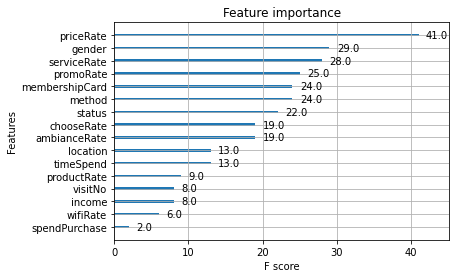

In [36]:
xgb.plot_importance(xgb_model)

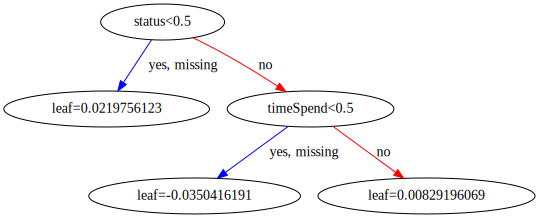

In [37]:
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)